<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Pesquisa-PID/Estudo-Descritivo/COVID_19_Estados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas e Visualizando os Dados

In [1]:
#Importando as Bibliotecas.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Criando Data Frame a partir dos dados da Plataforma Brasil.io.
df = pd.read_csv('covid-dados-br.csv')

In [4]:
#Visualizando às 10 primeiras linhas do Data Frame.
df.head(10)

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population_2019,is_last,is_repeated
0,26,2020-06-25,89,AC,Acrelândia,1200013.0,city,185,1212.63765,0,3,0,0.0162,15256.0,True,False
1,26,2020-06-25,56,AC,Assis Brasil,1200054.0,city,147,1981.93340,0,5,0,0.0340,7417.0,True,False
2,26,2020-06-25,48,AC,Brasiléia,1200104.0,city,287,1092.16835,0,6,0,0.0209,26278.0,True,False
3,26,2020-06-25,79,AC,Bujari,1200138.0,city,151,1470.87473,2,3,2,0.0199,10266.0,True,False
4,26,2020-06-25,49,AC,Capixaba,1200179.0,city,128,1090.94008,6,5,0,0.0391,11733.0,True,False
5,26,2020-06-25,74,AC,Cruzeiro do Sul,1200203.0,city,1973,2232.50656,33,32,1,0.0162,88376.0,True,False
6,26,2020-06-25,50,AC,Epitaciolândia,1200252.0,city,148,803.86725,1,6,0,0.0405,18411.0,True,False
7,26,2020-06-25,55,AC,Feijó,1200302.0,city,193,554.91662,16,5,1,0.0259,34780.0,True,False
8,26,2020-06-25,39,AC,Jordão,1200328.0,city,30,360.70699,0,0,0,0.0000,8317.0,True,False
9,26,2020-06-25,58,AC,Mâncio Lima,1200336.0,city,131,690.30932,8,3,0,0.0229,18977.0,True,False


# Manipulando os Dados

Como vamos trabalhar com os estados, devemos selecionar do Data Frame original somente as linhas em que a coluna 'place_type' for igual a 'state'.

Além disso, iremos selecionar somente as colunas de interesse para esse estudo.

**É possível então realizar esses dois processos utilizando um único método, este é o loc do Pandas.**

In [8]:
#Criando novo Data Frame com dados.
data = df.loc[df.place_type == 'state', ['state', 'last_available_confirmed', 'last_available_deaths', 'is_last', 'estimated_population_2019', 'last_available_confirmed_per_100k_inhabitants']]
#Visualizando uma Prévia desses Dados.
data.head(10)

,state,last_available_confirmed,last_available_deaths,is_last,estimated_population_2019,last_available_confirmed_per_100k_inhabitants
22,AC,12304,335,True,881935.0,1395.11415
126,AL,32065,958,True,3337357.0,960.79023
188,AM,67267,2731,True,4144597.0,1623.00460
205,AP,27415,394,True,845731.0,3241.57445
586,BA,54291,1601,True,14873064.0,365.02902
772,CE,103118,5895,True,9132078.0,1129.18440
775,DF,38871,509,True,3015268.0,1289.13914
855,ES,40406,1490,True,4018650.0,1005.46203
1066,GO,20377,384,True,7018354.0,290.33873
1282,MA,74925,1871,True,7075181.0,1058.98351


Nesses novos dados, desejamos trabalhar apenas com os últimos registros organizados a partir da coleta de dados dos boletins epidemiológicos

**Para isso, iremos filtrar do Data Frame todas as linhas nas quais a coluna 'is_last' for igual a True, também através do método loc.**

In [9]:
data = data.loc[data.is_last == True, :]
data

,state,last_available_confirmed,last_available_deaths,is_last,estimated_population_2019,last_available_confirmed_per_100k_inhabitants
22,AC,12304,335,True,881935.0,1395.11415
126,AL,32065,958,True,3337357.0,960.79023
188,AM,67267,2731,True,4144597.0,1623.00460
205,AP,27415,394,True,845731.0,3241.57445
586,BA,54291,1601,True,14873064.0,365.02902
772,CE,103118,5895,True,9132078.0,1129.18440
775,DF,38871,509,True,3015268.0,1289.13914
855,ES,40406,1490,True,4018650.0,1005.46203
1066,GO,20377,384,True,7018354.0,290.33873
1282,MA,74925,1871,True,7075181.0,1058.98351


**Podemos verificar a quantidade de linhas (que são respectivamente os estados) utilizando o método len**

In [10]:
len(data)

27

Após manipular o Data Frame e obter somente os dados equivalentes aos últimos registros, podemos retirar a coluna 'is_last'

**Para isso, utilizamos o método drop do Pandas, passando como parâmetro a coluna a ser removida**

In [11]:
data = data.drop('is_last', axis=1)
data

,state,last_available_confirmed,last_available_deaths,estimated_population_2019,last_available_confirmed_per_100k_inhabitants
22,AC,12304,335,881935.0,1395.11415
126,AL,32065,958,3337357.0,960.79023
188,AM,67267,2731,4144597.0,1623.00460
205,AP,27415,394,845731.0,3241.57445
586,BA,54291,1601,14873064.0,365.02902
772,CE,103118,5895,9132078.0,1129.18440
775,DF,38871,509,3015268.0,1289.13914
855,ES,40406,1490,4018650.0,1005.46203
1066,GO,20377,384,7018354.0,290.33873
1282,MA,74925,1871,7075181.0,1058.98351


# Verificando os Dados por Região

Nessa parte do estudo, desejamos agrupar os estados de acordo com a sua respectiva região

**Para isso, criaremos 5 Data Frames, baseado no Data Frame principal, utilizando o método query () para filtrar os estados desejados para cada região**

In [12]:
norte = data.query("state in ['AC', 'AP', 'AM', 'PA', 'TO', 'RR']")
norte

,state,last_available_confirmed,last_available_deaths,estimated_population_2019,last_available_confirmed_per_100k_inhabitants
22,AC,12304,335,881935.0,1395.11415
188,AM,67267,2731,4144597.0,1623.00460
205,AP,27415,394,845731.0,3241.57445
2282,PA,96472,4803,8602865.0,1121.39386
8596,RR,11872,271,605761.0,1959.84885
10081,TO,9425,183,1572866.0,599.22460


In [13]:
nordeste = data.query("state in ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI	', 'RN', 'SE']")
nordeste

,state,last_available_confirmed,last_available_deaths,estimated_population_2019,last_available_confirmed_per_100k_inhabitants
126,AL,32065,958,3337357.0,960.79023
586,BA,54291,1601,14873064.0,365.02902
772,CE,103118,5895,9132078.0,1129.18440
1282,MA,74925,1871,7075181.0,1058.98351
2501,PB,40824,842,4018127.0,1015.99576
2687,PE,55136,4488,9557071.0,576.91316
4294,SE,21081,554,2298696.0,917.08516
8525,RN,22665,858,3506853.0,646.30596


In [14]:
centro_oeste = data.query("state in ['DF', 'GO', 'MT', 'MS']")
centro_oeste

,state,last_available_confirmed,last_available_deaths,estimated_population_2019,last_available_confirmed_per_100k_inhabitants
775,DF,38871,509,3015268.0,1289.13914
1066,GO,20377,384,7018354.0,290.33873
2136,MT,12157,462,3484466.0,348.89134
7047,MS,6523,61,2778986.0,234.72590


In [15]:
sudeste = data.query("state in ['ES', 'MG', 'RJ', 'SP']")
sudeste

,state,last_available_confirmed,last_available_deaths,estimated_population_2019,last_available_confirmed_per_100k_inhabitants
855,ES,40406,1490,4018650.0,1005.46203
1936,MG,32769,806,21168791.0,154.79864
3320,RJ,105897,9450,17264943.0,613.36432
4916,SP,248587,13759,45919049.0,541.35921


In [16]:
sul = data.query("state in ['PR', 'RS', 'SC']")
sul

,state,last_available_confirmed,last_available_deaths,estimated_population_2019,last_available_confirmed_per_100k_inhabitants
3226,PR,17821,539,11433957.0,155.86030
3948,RS,23060,500,11377239.0,202.68538
4218,SC,21951,289,7164788.0,306.37334


# Total de Casos Confirmados por Região

**Agora, depois de agrupar os estados e visualizar os dados das regiões, podemos somá-los para verificar qual região possui o maior número de casos confirmados**

In [18]:
casos_norte = norte['last_available_confirmed'].sum()
casos_norte 

224755

In [19]:
casos_nordeste = nordeste['last_available_confirmed'].sum()
casos_nordeste 

404105

In [20]:
casos_centro_oeste = centro_oeste['last_available_confirmed'].sum()
casos_centro_oeste

77928

In [21]:
casos_sudeste = sudeste['last_available_confirmed'].sum()
casos_sudeste

427659

In [22]:
casos_sul = sul['last_available_confirmed'].sum()
casos_sul

62832

Depois de verificar, podemos visualizar o gráfico de casos confirmados por região

**Para isso, iremos agrupar as regiões e os casos somados, e gerar um gráfico de barras respectivo entre a região e os casos para mesma**

In [23]:
regioes = ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']

In [24]:
casos = [casos_norte, casos_nordeste, casos_centro_oeste, casos_sudeste, casos_sul]

**É possível gerar esse gráfico utilizando matplotlib de forma bem simples, com o plt.bar()**

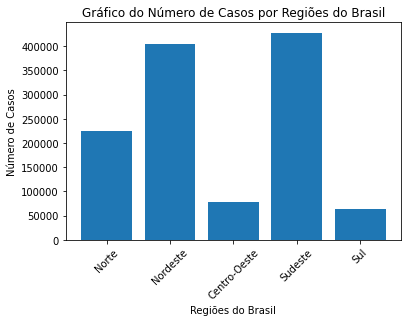

In [25]:
x = regioes
y = casos
plt.bar(x, y)

plt.title('Gráfico do Número de Casos por Regiões do Brasil')
plt.xlabel('Regiões do Brasil')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)

plt.show()

# Total de Mortes por Região

De forma análoga ao processo anterior, iremos verificar agora o número de mortes por região, podendo inferir qual possui o maior valor registrado

In [26]:
mortes_norte = norte['last_available_deaths'].sum()
mortes_norte 

8717

In [27]:
mortes_nordeste = nordeste['last_available_deaths'].sum()
mortes_nordeste 

17067

In [28]:
mortes_centro_oeste = centro_oeste['last_available_deaths'].sum()
mortes_centro_oeste 

1416

In [29]:
mortes_sudeste = sudeste['last_available_deaths'].sum()
mortes_sudeste 

25505

In [30]:
mortes_sul = sul['last_available_deaths'].sum()
mortes_sul 

1328

**Iremos também agrupar os dados de forma com que as regiões fiquem relacionadas com seus números respectivos**

In [31]:
mortes = [mortes_norte, mortes_nordeste, mortes_centro_oeste, mortes_sudeste, mortes_sul]

**E por fim, podemos também visualizar os números em forma de gráfico de barras**

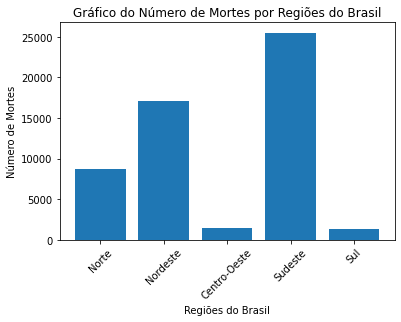

In [32]:
x = regioes
y = mortes
plt.bar(x, y)

plt.title('Gráfico do Número de Mortes por Regiões do Brasil')
plt.xlabel('Regiões do Brasil')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=45)

plt.show()

# Verificando e Visualizando Dados Populacionais dos Estados

Vamos verificar de forma ordenada quais são os estados que possuem maior população de acordo com o estimado pela nossa base de dados.

**Para isso, criamos um novo Data Frame a partir do DF anterior, ordenando os valores através do método sort_values (), passando como parâmetro a coluna em que deve ser aplicado e a forma com os dados devem ser ordenados, nesse caso de forma decrescente**

In [38]:
dados_pop = data.sort_values(by='estimated_population_2019', ascending=False)
dados_pop = dados_pop[['state', 'estimated_population_2019']]
dados_pop

,state,estimated_population_2019
4916,SP,45919049.0
1936,MG,21168791.0
3320,RJ,17264943.0
586,BA,14873064.0
3226,PR,11433957.0
3948,RS,11377239.0
2687,PE,9557071.0
772,CE,9132078.0
2282,PA,8602865.0
4218,SC,7164788.0


Para tornar mais didático a apresentação, podemos visualizar os dados através de um gráfico de barras.

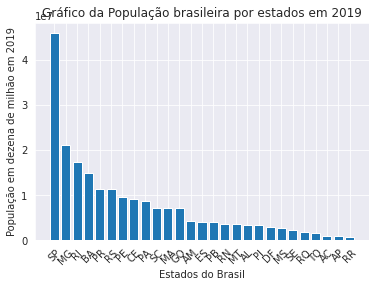

In [39]:
plt.bar(dados_pop['state'], dados_pop['estimated_population_2019'])

plt.title('Gráfico da População brasileira por estados em 2019')
plt.xlabel('Estados do Brasil')
plt.ylabel('População em dezena de milhão em 2019')
plt.xticks(rotation=45)

plt.show()

**Nesse caso, a visualização básica é confusa e pouco representativa**

**Para melhorar esse aspecto, utilizaremos uma outra biblioteca de forma conjunta com a Matplotlib, a Seaborn**

**A biblioteca Seaborn permite entre outras coisas a configuração da paleta de cores, o número de cores a partir dos dados e o estilo para o gráfico**


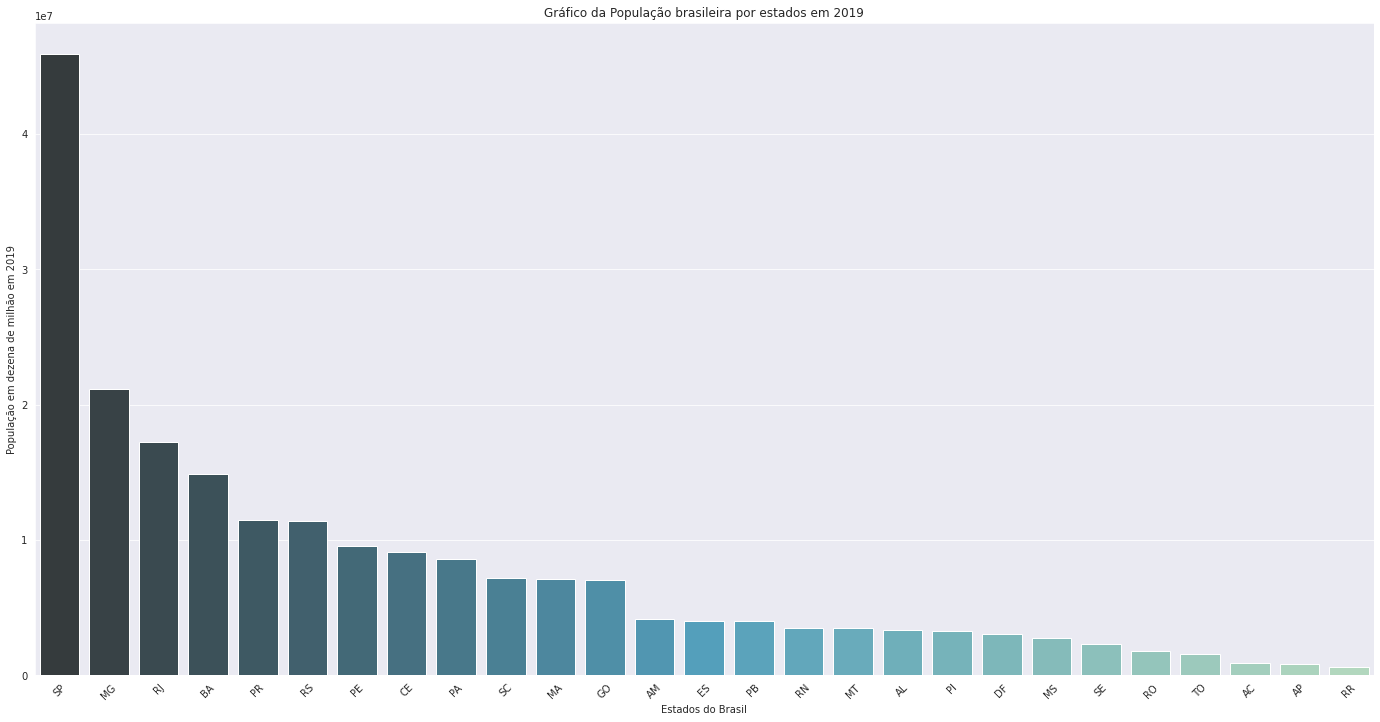

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize=(24,12))

sns.barplot(x=dados_pop.state, 
            y=dados_pop.estimated_population_2019,
            palette=sns.color_palette('GnBu_d' ,n_colors=len(dados_pop.state)))

plt.title('Gráfico da População brasileira por estados em 2019')
plt.xlabel('Estados do Brasil')
plt.ylabel('População em dezena de milhão em 2019')
plt.xticks(rotation=45)

plt.show()

# Comparando Dados da COVID-19. Absolutos x Proporcionais

Após verificar os dados populacionais, agora iremos trabalhar de forma mais direta com os dados relacionados com a COVID-19

**Criar um novo DF apenas com as colunas que contenham dados diretamente referentes a COVID-19,  a partir da desestruturação [ ] do DF anterior**

In [42]:
dados_covid = data[['state', 'last_available_confirmed', 'last_available_deaths', 'last_available_confirmed_per_100k_inhabitants']].reset_index()
dados_covid = dados_covid.drop('index', axis=1)
dados_covid.head(10)

,state,last_available_confirmed,last_available_deaths,last_available_confirmed_per_100k_inhabitants
0,AC,12304,335,1395.11415
1,AL,32065,958,960.79023
2,AM,67267,2731,1623.00460
3,AP,27415,394,3241.57445
4,BA,54291,1601,365.02902
5,CE,103118,5895,1129.18440
6,DF,38871,509,1289.13914
7,ES,40406,1490,1005.46203
8,GO,20377,384,290.33873
9,MA,74925,1871,1058.98351


Nessa parte do estudo, vamos verificar de forma ordenada os estados com maior número de casos registrados de covid.

**Para isso, utilizaremos o método sort_values() como no processo anterior.**

In [44]:
dados_confirmed = dados_covid.sort_values(by='last_available_confirmed', ascending=False)
dados_confirmed = dados_confirmed[['state', 'last_available_confirmed']]
dados_confirmed

,state,last_available_confirmed
21,SP,248587
17,RJ,105897
5,CE,103118
12,PA,96472
9,MA,74925
2,AM,67267
14,PE,55136
4,BA,54291
13,PB,40824
7,ES,40406


**Iremos também gerar o gráfico utilizando a biblioteca Seaborn**

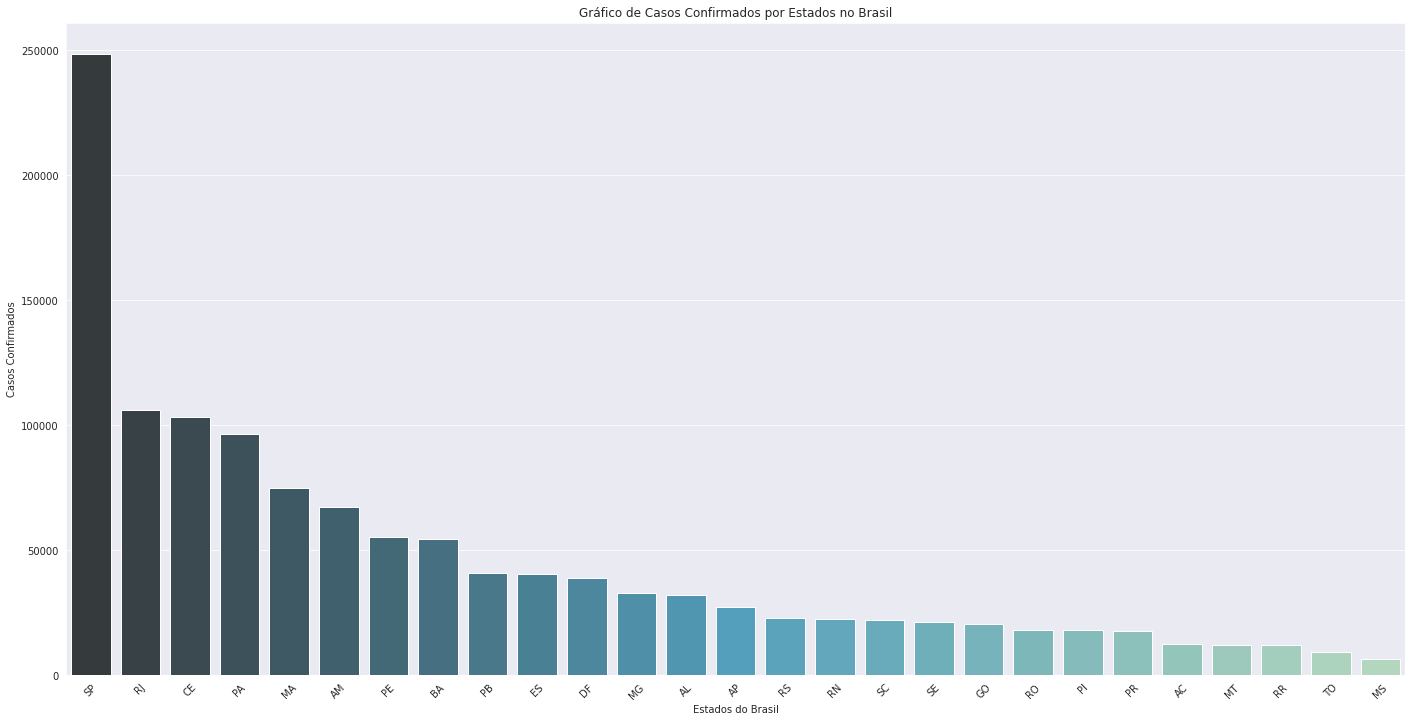

In [46]:
sns.set_style('darkgrid')
plt.figure(figsize=(24,12))

sns.barplot(x=dados_confirmed.state, 
            y=dados_confirmed.last_available_confirmed,
            palette=sns.color_palette('GnBu_d' ,n_colors=len(dados_confirmed.state)))

plt.title('Gráfico de Casos Confirmados por Estados no Brasil')
plt.xlabel('Estados do Brasil')
plt.ylabel('Casos Confirmados')
plt.xticks(rotation=45)

plt.show()

Essa visualização acima mostra os estados que possuem mais casos acumulados registrados, no entanto, vimos que os estados do Brasil possuem discrepâncias entre suas respectivas populações, por isso não seria mais justo uma comparação proporcional ?

**Para realizar essa comparação, iremos agora ordenar os estados de acordo com o número de casos confirmados por 100 mil habitantes**

In [47]:
dados_habitants = dados_covid.sort_values(by='last_available_confirmed_per_100k_inhabitants', ascending=False)
dados_habitants = dados_habitants[['state', 'last_available_confirmed_per_100k_inhabitants']]
dados_habitants

,state,last_available_confirmed_per_100k_inhabitants
3,AP,3241.57445
25,RR,1959.84885
2,AM,1623.00460
0,AC,1395.11415
6,DF,1289.13914
5,CE,1129.18440
12,PA,1121.39386
9,MA,1058.98351
24,RO,1022.54920
13,PB,1015.99576


Há mudanças significativas, não é ?

**Para melhor visualizar, podemos novamente gerar o gráfico de barras, baseando-se no modelo anterior**

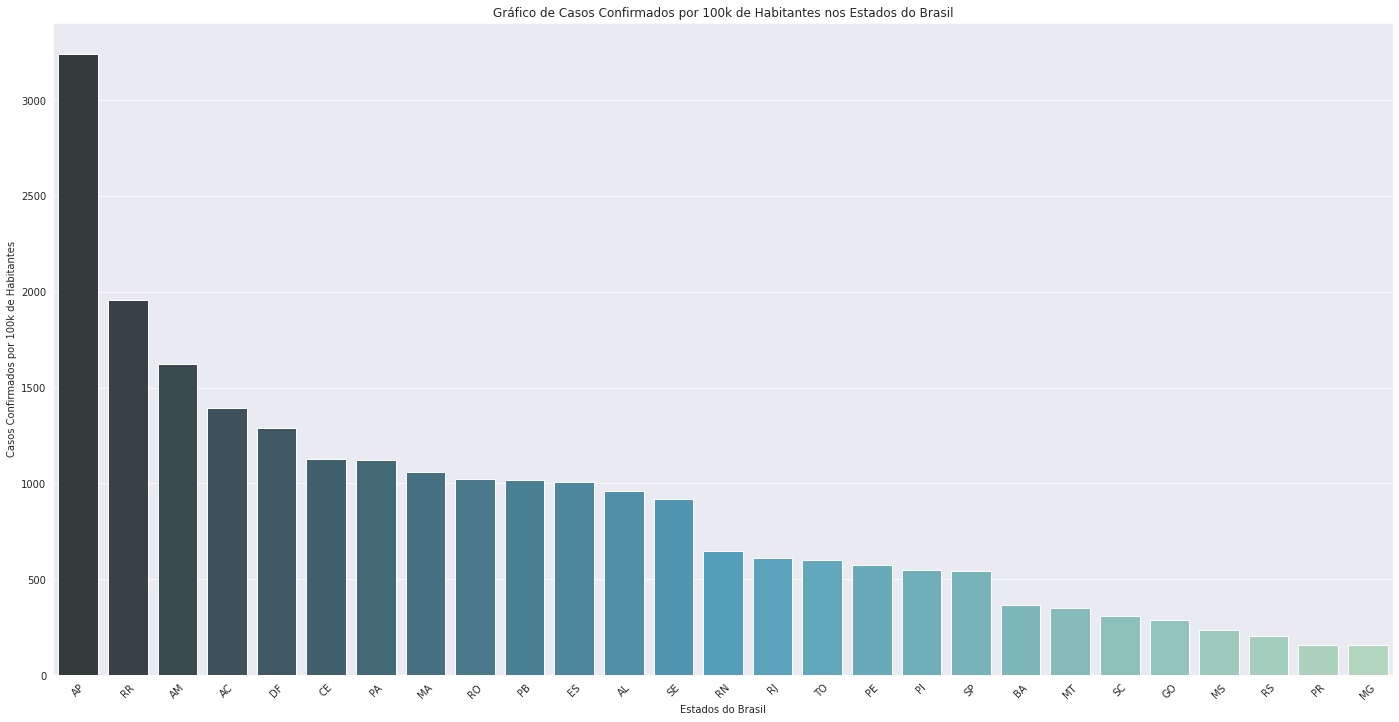

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(24,12))

sns.barplot(x=dados_habitants.state, 
            y=dados_habitants.last_available_confirmed_per_100k_inhabitants,
            palette=sns.color_palette('GnBu_d' ,n_colors=len(dados_habitants.state)))

plt.title('Gráfico de Casos Confirmados por 100k de Habitantes nos Estados do Brasil')
plt.xlabel('Estados do Brasil')
plt.ylabel('Casos Confirmados por 100k de Habitantes')
plt.xticks(rotation=45)

plt.show()

# Parte Complementar

**De forma complementar, podemos repetir o processo e verificar quais são os estados com registro de mortes, gerando seu respectivo gráfico de barras para o Data Frame.**

In [49]:
dados_deaths = dados_covid.sort_values(by='last_available_deaths', ascending=False)
dados_deaths = dados_deaths[['state', 'last_available_deaths']]
dados_deaths

,state,last_available_deaths
21,SP,13759
17,RJ,9450
5,CE,5895
12,PA,4803
14,PE,4488
2,AM,2731
9,MA,1871
4,BA,1601
7,ES,1490
1,AL,958


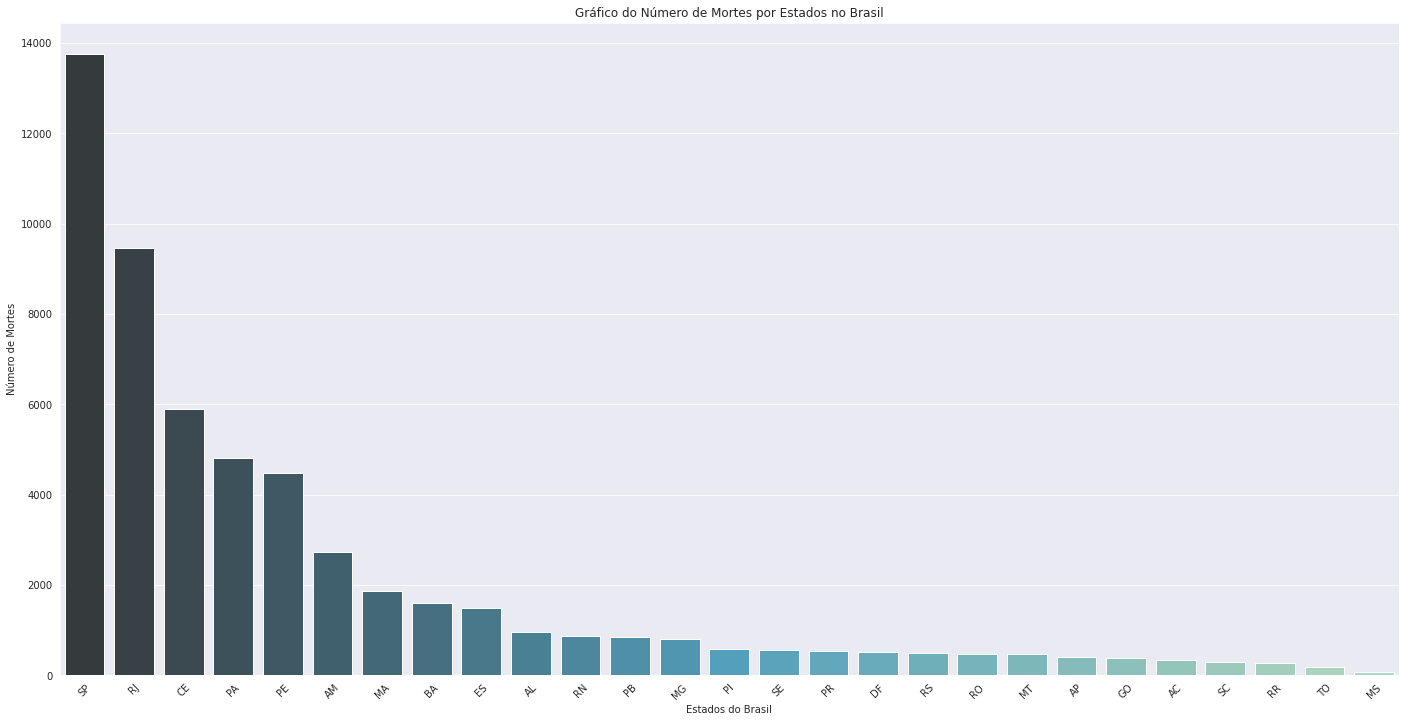

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(24,12))

sns.barplot(x=dados_deaths.state, 
            y=dados_deaths.last_available_deaths,
            palette=sns.color_palette('GnBu_d' ,n_colors=len(dados_deaths.state)))

plt.title('Gráfico do Número de Mortes por Estados no Brasil')
plt.xlabel('Estados do Brasil')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=45)

plt.show()